In [1]:
!pip install torch torchvision torchaudio

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-254-gba63208 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [3]:
import os
import numpy as np
import glob as glob
import matplotlib.pyplot as plt
import random
import cv2
import requests

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JaHbuZAnQIPRBy5b2aU8")
project = rf.workspace("lemons").project("number-plates-i91pc")
dataset = project.version(10).download("yolov5")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to number-plates-10 in yolov5pytorch:: 100%|██████████| 5162/5162 [00:00<00:00, 5564.08it/s]


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JaHbuZAnQIPRBy5b2aU8")
project = rf.workspace("iambeginner").project("testingplate")
dataset = project.version(4).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to testingplate-4 in yolov5pytorch:: 100%|██████████| 2184/2184 [00:00<00:00, 5303.67it/s]


In [6]:
%cd ../yolov5
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{s}' for s in p5]  # segmentation mode

for s in cls:
    attempt_download(f'weights/yolov5{s}.pt')

/content/yolov5


100%|██████████| 3.87M/3.87M [00:00<00:00, 53.5MB/s]

100%|██████████| 14.1M/14.1M [00:00<00:00, 131MB/s]

100%|██████████| 40.8M/40.8M [00:00<00:00, 165MB/s]

100%|██████████| 89.3M/89.3M [00:00<00:00, 126MB/s]

100%|██████████| 166M/166M [00:02<00:00, 74.5MB/s]



In [7]:
!python /content/yolov5/train.py --data /content/yolov5/number-plates-10/data.yaml --weights /content/yolov5/weights/yolov5s.pt --img 416 --batch 16 --epochs 60

2023-12-29 07:35:29.800008: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 07:35:29.800070: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 07:35:29.802048: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/yolov5/weights/yolov5s.pt, cfg=, data=/content/yolov5/number-plates-10/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=Fals

In [8]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --source /content/yolov5/number-plates-10/test/images --img 416 --conf 0.25 --save-crop

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/number-plates-10/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-254-gba63208 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/96 /content/yolov5/number-plates-10/test/images/105_jpg.rf.1acc7e8f4efcbda8fdcdd20aa4c05176.jpg: 416x416 1 license-plates, 7.1ms
image 2/96 /content/yolov5/number-plates-10/test/images/13_jpeg_jpg.rf.b658cf504b9628f471cf2e4b7e6339ee.jpg: 416x416 1 license-plates, 7.1ms
image 3/96 /

In [31]:
!pip install easyocr

In [32]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/yolov5/runs/train/exp/weights/best.pt', force_reload=True)

reader = easyocr.Reader(['en'])

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-254-gba63208 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [33]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [34]:
image_path= "/content/yolov5/runs/detect/exp/crops/license-plates/Cars0_png.rf.dc198601b1aae6d83669fe522f0bf5b4.jpg"

In [35]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(image_path)
result

[([[22, 0], [206, 0], [206, 62], [22, 62]], 'KLo1CA2555', 0.4397394375261783)]

KLo1CA2555


<function matplotlib.pyplot.show(close=None, block=None)>

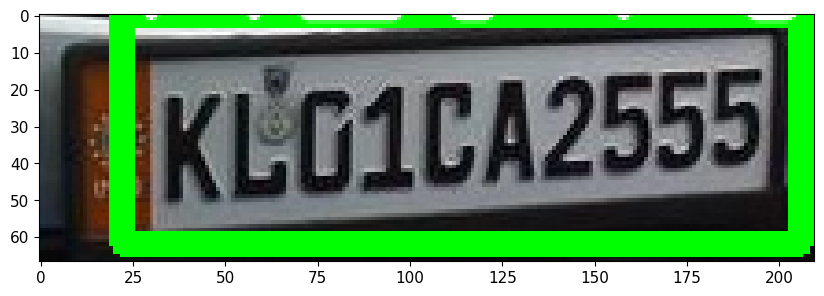

In [30]:
img = cv2.imread(image_path)
for detection in result:
  top_left= tuple([int(val) for val in detection[0][0]])
  bottom_right= tuple([int(val) for val in detection[0][2]])
  text = detection[1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
  img = cv2.putText(img, text, top_left, font, 2, (255,255,255), 2, cv2.LINE_AA)
print(text)
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show